In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sales = pd.read_csv('supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
#number of rows and columns in the dataset
sales.shape

(1000, 17)

In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [37]:
#change date and time's datatype
sales['Date'] = sales['Date'].astype('datetime64')
sales['Time'] = sales['Time'].astype('datetime64')
# pd.to_datetime(sales['Time'])

In [38]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [39]:
#drop duplicates -- no duplicates in the dataset as shape remains the same
sales.drop_duplicates(inplace=True)
sales.shape

(1000, 17)

In [40]:
#dropping missing values
sales.dropna(inplace=True)

In [41]:
sales.shape

(1000, 17)

## Sales Performance & Trends:

### 1. Sales Peformance Analysis

In [42]:
#total sales revenue
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-07-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-07-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-07-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-07-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-07-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


#### The total revenue of sales is $322966.749

In [43]:
#Total Revenue
total_revenue = sales['Total'].sum()
total_revenue

322966.749

In [44]:
#Average Sales Revenue per invoice
avg_sales = sales.groupby('Invoice ID')['Total'].mean()
avg_sales.head()

Invoice ID
101-17-6199    336.5565
101-81-4070    131.9220
102-06-2002    132.5625
102-77-2261    480.0285
105-10-6182     45.1080
Name: Total, dtype: float64

### 2. Branch & City Analysis

In [45]:
#Branch with the highest total sales revenue
branch_sales = sales.groupby('Branch')['Total'].sum()
branch_sales = branch_sales.sort_values(ascending=False)
branch_sales

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

#### The branch with the highest total sales revenue is C.

In [46]:
branch_sales.head(1)

Branch
C    110568.7065
Name: Total, dtype: float64

In [47]:
#sales performance by city
city_sales = sales.groupby('City')['Total'].sum()
city_sales

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

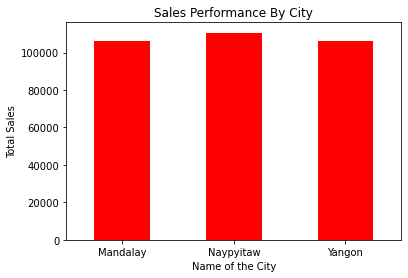

In [48]:
city_sales.plot(kind='bar', color='red')
plt.xlabel('Name of the City')
plt.ylabel('Total Sales')
plt.title('Sales Performance By City')
plt.xticks(rotation=360)
plt.show()

### 3. Product Line Analysis

In [49]:
#product line with most revenue
prod_line = sales.groupby('Product line')['Total'].sum()
prod_line = prod_line.sort_values(ascending=False)
prod_line

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

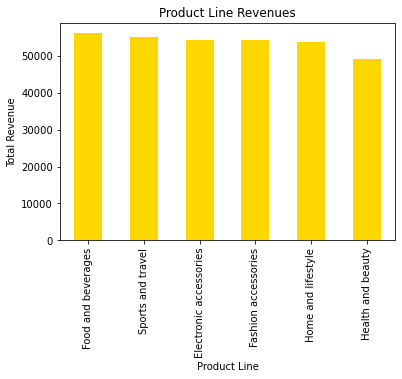

In [50]:
prod_line.plot(kind='bar', color='gold')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.title('Product Line Revenues')
plt.show()

In [51]:
#Average Unit Price and quantity sold per product line
up_qs = sales.groupby('Product line')[['Unit price', 'Quantity']].mean()
up_qs

,Unit price,Quantity
Product line,,
Electronic accessories,53.551588,5.711765
Fashion accessories,57.153652,5.067416
Food and beverages,56.008851,5.471264
Health and beauty,54.854474,5.618421
Home and lifestyle,55.316937,5.693750
Sports and travel,56.993253,5.542169


## Customer Insights

In [52]:
#average sales revenue between male and female
diff = sales.groupby('Gender')['Total'].mean()
diff

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [53]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-07-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-07-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-07-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-07-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-07-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [54]:
#distribution of sales bw customer types
cust_types = sales.groupby('Customer type')['Total'].sum()

In [55]:
cust_types

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

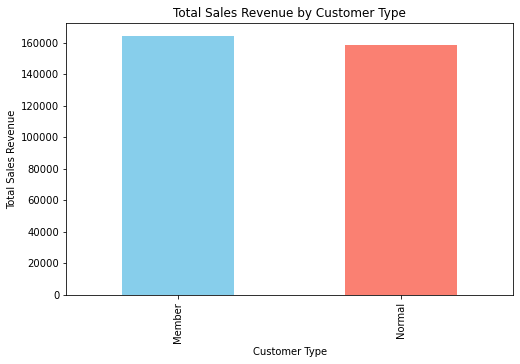

In [56]:
plt.figure(figsize=(8,5))
cust_types.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Sales Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales Revenue')
plt.show()

In [57]:
#average rating given by each customer type
avg_rating = sales.groupby('Customer type')['Rating'].mean()

In [58]:
avg_rating

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

## Time Series Analysis

In [62]:
#sales trends over time -- daily, monthly
sales['Month'] = sales['Date'].dt.month_name().str.slice(stop=3)
sales['Day'] = sales['Date'].dt.day_name().str.slice(stop=3)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-07-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Sat,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-07-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Fri,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-07-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sun,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-07-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sun,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-07-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Fri,Feb


In [72]:
time_sales = sales.groupby(['Month'])['Total'].sum()

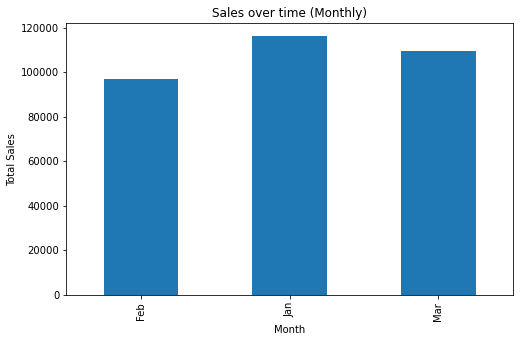

In [75]:
plt.figure(figsize=(8,5))
time_sales.plot(kind='bar')
plt.title('Sales over time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [79]:
time_sales2 = sales.groupby('Day')['Total'].sum()

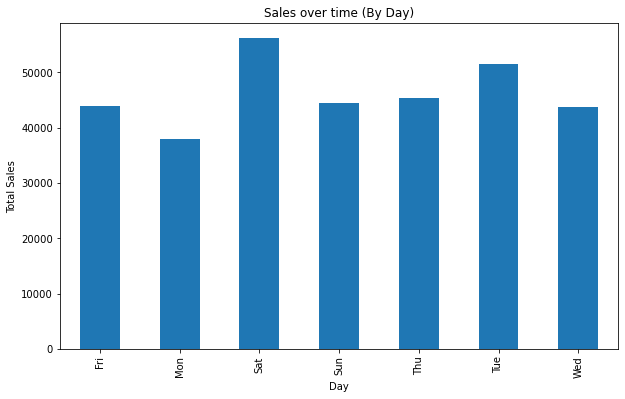

In [81]:
plt.figure(figsize=(10,6))
time_sales2.plot(kind='bar')
plt.title('Sales over time (By Day)')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()